<a href="https://colab.research.google.com/github/EndoTaishi/seaiceextent/blob/main/sea_ice_MME_efficient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### 適切にディレクトリを移動するように書き直してみてください

### Set up
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# change current directory
%cd /content/drive/MyDrive/seminar2023/nozue/sea_icemodel

# check the content of current directory 
# %ls

Mounted at /content/drive
/content/drive/MyDrive/seminar2023/nozue/sea_icemodel


In [2]:
pip install netCDF4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 92.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 82.5 MB/s eta 0:00:00


filenames, ['siextentn_SImon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-201412.nc', 'siextentn_SImon_ACCESS-CM2_historical_r3i1p1f1_gn_185001-201412.nc', 'siextentn_SImon_ACCESS-ESM1-5_historical_r1i1p1f1_gn_185001-201412.nc', 'siextentn_SImon_ACCESS-ESM1-5_historical_r3i1p1f1_gn_185001-201412.nc', 'siextentn_SImon_ACCESS-ESM1-5_historical_r5i1p1f1_gn_185001-201412.nc', 'siextentn_SImon_CESM2-FV2_historical_r1i1p1f1_gn_185001-189912.nc', 'siextentn_SImon_CESM2-FV2_historical_r1i1p1f1_gn_190001-194912.nc', 'siextentn_SImon_CESM2-FV2_historical_r1i1p1f1_gn_195001-199912.nc', 'siextentn_SImon_CESM2-FV2_historical_r1i1p1f1_gn_200001-201412.nc', 'siextentn_SImon_CESM2-WACCM-FV2_historical_r1i1p1f1_gn_185001-189912.nc', 'siextentn_SImon_CESM2-WACCM-FV2_historical_r1i1p1f1_gn_190001-194912.nc', 'siextentn_SImon_CESM2-WACCM-FV2_historical_r1i1p1f1_gn_195001-199912.nc', 'siextentn_SImon_CESM2-WACCM-FV2_historical_r1i1p1f1_gn_200001-201412.nc', 'siextentn_SImon_CESM2-WACCM_historical_r1i1p1f1_gn_1

<ipython-input-5-26892bd0e298>:55: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  sum_siextenth.append(ds['siextentn'][i])
<ipython-input-5-26892bd0e298>:56: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  MMA_siextenth.append(ds['siextentn'][i])


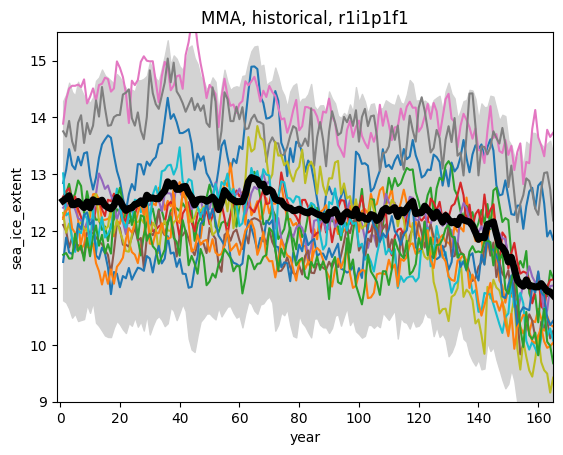

In [5]:
#陰影

### Import modules
import os
import csv
import math
from netCDF4 import Dataset
import matplotlib.pyplot as plt

### variables
ensemble="r1i1p1f1" #指定するアンサンブル

### Store file names by model names into directory
model_dict = {}
filenames = sorted(os.listdir()) #場所をcdでseaice_modelにしているからその中のデータを並び替えている。年代順・アンサンブル順にも
print("filenames,", filenames)

##########################アンサンブルを揃えたマルチモデルの場合の変更点###############################
for filename in filenames:
  
  if filename.split('_')[4] in ensemble:
    model_name = filename.split('_')[2] #並び替えた文字列をsplitで_の2個目で分割　例)siextentn_SImon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-201412.nc
    
    print(model_name, end = '\t')
    
    if model_name not in model_dict:    #並び替えた文字列がディクショナリにない場合
      model_dict[model_name] = [filename] #分割されたモデルもいれることができる。keyに対してvalueは複数可能
    else:
      model_dict[model_name].append(filename) #ディクショナリのキーに2個目で分割した文字列を入れる。

print("")
print("model_dict,",model_dict)

############################################################################

### Plot average of sea ice extent every model
# store sea ice extent throughout all the years by models
counter=0
MMA_siextenth=[]

for model_name, files in model_dict.items(): #ディレクトリ内をループのため、itms method
  sum_siextenth = []

  for file in files: #ディクショナリのvalueの部分がfileになっているため
    #print(file) データは分かれている。

    ds = Dataset(file, mode='r',format="NETCDF4")
    run_time = len(ds['time']) #timeのもの
    
    for i in range(run_time):
      if len(ds['siextentn'].dimensions) > 1: #dsのdimensionが1つ以上
        sum_siextenth.append(ds['siextentn'][i][0][0]) 
        MMA_siextenth.append(ds['siextentn'][i][0][0]) 
      else:
        sum_siextenth.append(ds['siextentn'][i])
        MMA_siextenth.append(ds['siextentn'][i]) 
    
  counter+=1 #モデルの数を数える
    
#################### それぞれのmodel ###################
  #lists & variables　　
  ice_map = []
  year_map = []
  count = 0
  sum = 0
  ave = 0
    
  # calculate average of sea ice extent every year
  for i in range(len(sum_siextenth)):
    sum += sum_siextenth[i]
    count += 1
    
    if count % 12 == 0:
      ave = sum / 12
      ice_map.append(ave)
      sum = 0
    
  for i in range(len(ice_map)):
    year_map.append(i+1)

  #plt.figure(figsize=(6, 6)
  plt.plot(year_map,ice_map)
  plt.ylim(9.0,15.5)
  plt.xlim(-1,165)
  plt.ylabel('sea_ice_extent')

####################### average ###########

#lists & variables
MMA_map = []
SL_1_map = []
SL_2_map = []
year_map = []
count = 0
sum = 0
ave = 0
mon_average=[]
result=0
dispersion=0
SD=0
SL_1=[]
SL_2=[]

for i in range(run_time):
   for x in range(counter):
   #MMA_siextenth[0+1980*0]+MMA_siextenth[0+1980*1]+MMA_siextenth[0+1980+1980] 
     result += MMA_siextenth[i+run_time*x]
   
   mon_average.append(result/counter)
   result=0

   for x in range(counter):
     dispersion += (mon_average[i] - MMA_siextenth[i+run_time*x])**2
     
   SD = math.sqrt(dispersion/counter)
   #print(dispersion)

   SL_1.append(mon_average[i] + (SD*2))
   SL_2.append(mon_average[i] - (SD*2))
   dispersion=0

#######平均のグラフ#############
for i in range(len(mon_average)):
  sum += mon_average[i]
  count += 1
    
  if count % 12 == 0:
    ave = sum / 12
    MMA_map.append(ave)
    sum = 0
    
########有意水準のグラフ########
for i in range(len(mon_average)):
  sum += SL_1[i]
  count += 1
    
  if count % 12 == 0:
    ave = sum / 12
    SL_1_map.append(ave)
    sum = 0

for i in range(len(mon_average)):
  sum += SL_2[i]
  count += 1
    
  if count % 12 == 0:
    ave = sum / 12
    SL_2_map.append(ave)
    sum = 0

for i in range(len(SL_1_map)):
  year_map.append(i+1)

#plt.figure(figsize=(6, 6)

plt.plot(year_map,MMA_map,linewidth=5, color= 'black')
plt.fill_between(year_map, SL_1_map, SL_2_map, color="lightgray")
plt.ylim(9.0,15.5)
plt.xlim(-1,165)
plt.ylabel('sea_ice_extent')
plt.title(f'MMA, historical, {ensemble}') #fの部分
plt.xlabel('year')
plt.show()        